
| round | initially labeled data | number of queries | cost | Performance: |
|   0   |    73 (5.02% of all)   |        1382       |  0   | 0.806 ± 0.00 |
| round | initially labeled data | number of queries | cost | Performance: |
|   1   |    73 (5.02% of all)   |        1382       |  0   | 0.763 ± 0.00 |
| round | initially labeled data | number of queries | cost | Performance: |
|   2   |    73 (5.02% of all)   |        1382       |  0   | 0.800 ± 0.00 |
| round | initially labeled data | number of queries | cost | Performance: |
|   3   |    73 (5.02% of all)   |        1382       |  0   | 0.784 ± 0.00 |
| round | initially labeled data | number of queries | cost | Performance: |
|   4   |    73 (5.02% of all)   |        1382       |  0   | 0.785 ± 0.00 |
| round | initially labeled data | number of queries | cost | Performance: |
|   5   |    73 (5.02% of all)   |        1382       |  0   | 0.777 ± 0.00 |
| round | initially labeled data | number of queries | cost | Performance: 

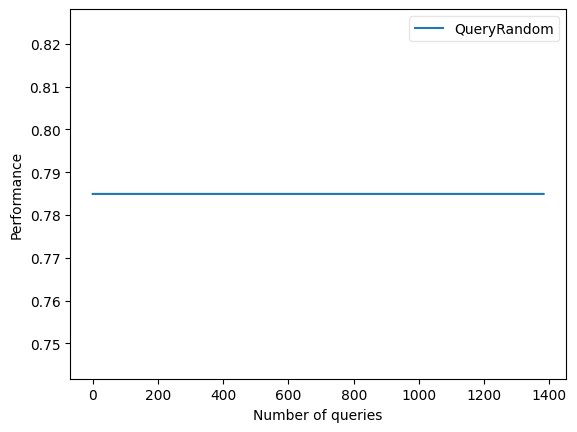

In [1]:
import json
from sklearn.utils import shuffle
import pandas as pd
from sklearn.datasets import load_iris
from alipy.experiment.al_experiment import AlExperiment
import warnings
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, MaxAbsScaler
from sklearn.svm import SVC
warnings.filterwarnings("ignore")    #忽略警告

def test5():
    # 从JSON文件中读取数据
    with open('../../tempFiles/dataset.json', 'r') as file:
        data = json.load(file)
    features = []
    labels = []

    for entry in data:
        feature = entry['feature']
        label = int(entry['label'])
        features.append(feature)
        labels.append(label)

    # 创建数据集
    dataset = pd.DataFrame(features)
    dataset['label'] = labels
    X = dataset.drop('label', axis=1)
    y = dataset['label']
    # 特征正则化处理
    scaler =  Normalizer()
    X_scaled = scaler.fit_transform(X)
    y= np.array(y)
    # 准备数据集，假设您的特征数据保存在X变量中，目标变量保存在y变量中
    X = X_scaled  # 特征数据
    model = SVC()

 
    al = AlExperiment( X_scaled,y, stopping_criteria='num_of_queries', stopping_value=len(X_scaled),model=model)
    al.split_AL()
    al.set_query_strategy(strategy="QueryRandom", measure='least_confident')
    al.set_performance_metric('accuracy_score')
    al.start_query(multi_thread=False)    #开启多线程
    al.plot_learning_curve()

if __name__ == '__main__':
    test5()
